In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm 
import statistics 
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing and reading data in data frame

In [2]:
#read the data in pandas data frame 
df = pd.read_csv("Leads.csv")

In [3]:
# check data in loaded in the data frame
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Inspecting data 

In [4]:
# check the shape of the data frame
df.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- int , float and object are the data types of the available data
- there are some columns with null values 
- there are some identifier columns like "Prospect ID" , "Lead Number" 
- there are some categorical columns like "Lead Origin" ,  "Lead Source" , Converted etc for which the data type is not categorical but object
- numerical columns are TotalVisits , Total Time Spent , Page Views Per Visit  on Website


In [7]:
# analysing if column Lead Number has unique values 
len(df.groupby(["Lead Number"])["Lead Number"].count())
# looks like all Lead number are unique values just like any other identifier

9240

In [8]:
# Lets calculate the columns which has missing value
df.isnull().any()

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                       True
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                       True
Total Time Spent on Website                      False
Page Views Per Visit                              True
Last Activity                                     True
Country                                           True
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                   True
What matters most to you in choosing a course     True
Search                                           False
Magazine                                         False
Newspaper 

In [9]:
# Looks like there are null values for some columns 
# lets calculate percentage null count columnwise

percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing[percent_missing >0]


Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.6493

- Asymmetrique Profile Score, Asymmetrique Activity Score,Asymmetrique Profile Index, Asymmetrique Activity Index, Lead Quality, Tags has more than 30% of null value
- Country and City gives the similar information of location of lead.  

In [10]:
#Lets inspect the categorical columns one by one and see if it needs any data cleaning 
list_of_cat_columns = ["Lead Origin", "Lead Source" , "Do Not Email" , "Do Not Call" , "Converted" , "Last Activity" , "Country" , "Specialization" , "How did you hear about X Education" , 
                       "What is your current occupation" , "What matters most to you in choosing a course","Search" , "Magazine" , "Newspaper Article" , "X Education Forums" , "Newspaper"
                       ,"Digital Advertisement" , "Through Recommendations" , "Receive More Updates About Our Courses", "Tags" , "Lead Quality",
                      "Update me on Supply Chain Content" , "Get updates on DM Content" , "Lead Profile" , "City" , "Asymmetrique Activity Index" ,
                      "Asymmetrique Profile Index" , "I agree to pay the amount through cheque" , "A free copy of Mastering The Interview","Last Notable Activity"]

In [11]:
len(list_of_cat_columns)

30

In [12]:
for col in list_of_cat_columns:
    print("***********************")
    print(col)
    print("***********************")
    print(df[col].value_counts())
    

***********************
Lead Origin
***********************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
***********************
Lead Source
***********************
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
youtubechannel          1
WeLearn                 1
Pay per Click Ads       1
testone                 1
blog                    1
welearnblog_Home        1
NC_EDM                  1
Name: Lead Source, dtype: int64
***********************
Do Not Email
***********************
No     8506
Yes     734
Name: Do Not Email, dtype

- Prospect Id and Lead Number are unique identifier 
- Column country has 5 records with "unknown" value 
- Column Specialization , has 1942 records where customers have not selected any value and has the value 
  as Select. Its different from having null value, but functionally it can be same.
- "How did you hear about X Education" has 5043 records with *select*   val
- "Update me on Suppy Chain" has all records with value No 
- "Get updates on DM content" has all records with value No
- "Lead Profile" has value as Select for 4146 records
- City has value as Select for 2249 records.
- Lead Source has value like "Google" and "google". We would need to convert google to Google


### Actions 
- drop unique identifier columns i.e.Prospect Id  
- drop columns which has more than 30% missing values i.e drop Asymmetrique Profile Score, Asymmetrique Activity Score,Asymmetrique Profile Index, Asymmetrique Activity Index, Lead Quality, Tags
- drop Country columns 

In [13]:
drop_columns = ["Prospect ID"  ,"Lead Quality", "Asymmetrique Profile Score","Asymmetrique Activity Score",
               "Asymmetrique Profile Index" , "Asymmetrique Activity Index"  , "Country" , "Get updates on DM Content" , "Update me on Suppy Chain"]
for col in drop_columns:
    if col in df.columns:
        df.drop(col , axis =1 , inplace=True)

In [14]:
# recalculating percentage of null values after dropping columns mentioned in list drop_columns
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing[percent_missing >0]

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Profile                                     29.318182
City                                             15.367965
dtype: float64

# Imputing missing values

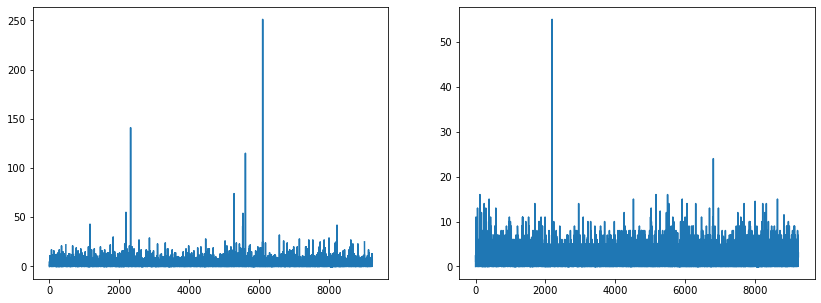

In [15]:
#lets plot the numerical columns with null value 
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(df["TotalVisits"])
plt.subplot(122)
plt.plot(df["Page Views Per Visit"])


In [16]:
#impute the numerical columns with median
num_cols = ["TotalVisits" , "Page Views Per Visit"]
for col in num_cols:
    m = df[col].median()
    df[col]=df[col].fillna(m)

In [17]:
# updating the list of categorical columns 
for col in list_of_cat_columns:
    if col not in df.columns:
        list_of_cat_columns.remove(col)
print(len(list_of_cat_columns))

26


<AxesSubplot:title={'center':'After Imputing with Most Frequent Value'}, xlabel='Tags', ylabel='count'>

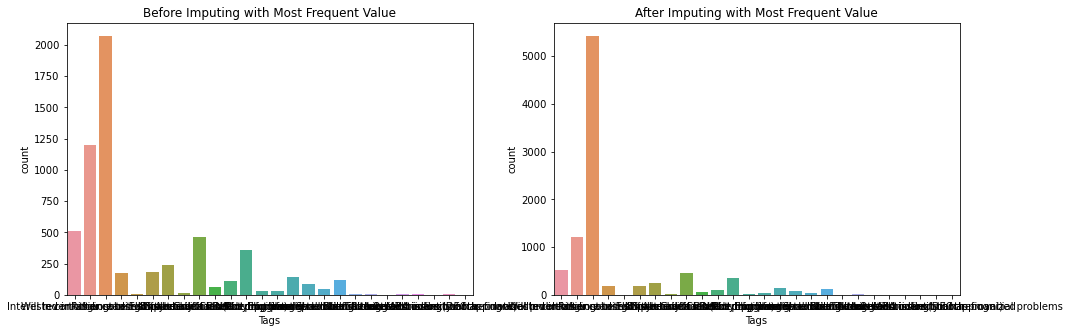

In [18]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("Before Imputing with Most Frequent Value")
sns.countplot(data = df, x = 'Tags')
plt.subplot(122)
plt.title("After Imputing with Most Frequent Value")
sns.countplot(data = df.fillna(value = df['Tags'].mode()[0]), x = 'Tags')

- After imputing Tags with most common value, skewness will increase a lot. So we will not impute for now. 

In [19]:
list_of_lastactivity = df[df['Last Activity'].isnull()]['Tags'].value_counts()

- Imputing Last Activity.So based on tags we will going to impute the 'Last Activity' by using the most frequent item.We will calculate the value counts of tags,where Last Activity is null. Then will calculate the most common value of Last Activity where Tags in Known and will use this calculated value to impute Last Activity.


In [20]:
list_of_lastactivity

Closed by Horizzon                     47
Will revert after reading the email    26
Ringing                                12
Interested in other courses             4
Lost to EINS                            2
Interested  in full time MBA            1
number not provided                     1
Busy                                    1
Name: Tags, dtype: int64

In [21]:
for lastActivity in range(len(list_of_lastactivity)):
    #print(list_of_lastactivity.index[lastActivity] , list_of_lastactivity.values[lastActivity])
    lAc = list_of_lastactivity.index[lastActivity]
    m = df[df["Tags"] == lAc]["Last Activity"].mode()[0]
    df.loc[(df['Last Activity'].isnull()) & (df['Tags'] == lAc), 'Last Activity'] = m

    

In [22]:
# still there are some Null values in Last Activity, these values are one for which both Tags and last Activity 
# are null . I will imput ot with the mode of Last Activity now.
df['Last Activity'].fillna(df['Last Activity'].mode()[0] , inplace=True)

<AxesSubplot:title={'center':'After Imputing with Most Frequent Value'}, xlabel='Lead Source', ylabel='count'>

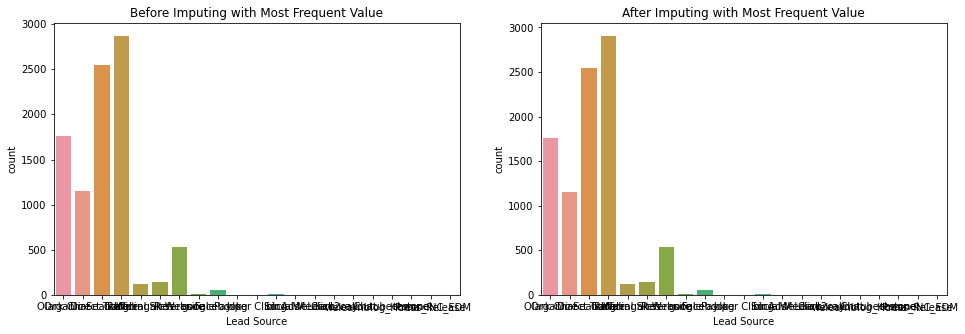

In [23]:
# Comparing Before and after imputing with mode of Lead Source Column

plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("Before Imputing with Most Frequent Value")
sns.countplot(data = df, x = 'Lead Source')
plt.subplot(122)
plt.title("After Imputing with Most Frequent Value")
sns.countplot(data = df.fillna(value = df['Lead Source'].mode()[0]), x = 'Lead Source')

In [24]:
#Imputing Lead Score with mode 
df['Lead Source'].fillna(value = df['Lead Source'].mode()[0] , inplace = True)

In [25]:
## impute null and "Select" with unknown value for Specializatin
df['Specialization'][df['Specialization'].isnull() | (df['Specialization'] =="Select")  ] = "Unknown"

In [26]:
#Impute City with most comon values #
df['City'][df['City'].isnull() | (df['City'] =="Select")  ] = df['City'].mode()[0]

In [27]:

len(df['How did you hear about X Education'][df['How did you hear about X Education'].isnull() | (df['How did you hear about X Education'] =="Select")  ])

7250

In [28]:
#7250 values are either null or user didnot provide any value  for column "How did you hear about X Education'][df['How did you hear about X Education"
#Dropping the column
df = df.drop('How did you hear about X Education' , axis =1 )

In [29]:
#What is your current occupation

len(df['What is your current occupation'][df['What is your current occupation'].isnull() | (df['What is your current occupation'] =="Select")  ])

2690

<AxesSubplot:title={'center':'After Imputing with Most Frequent Value'}, xlabel='What is your current occupation', ylabel='count'>

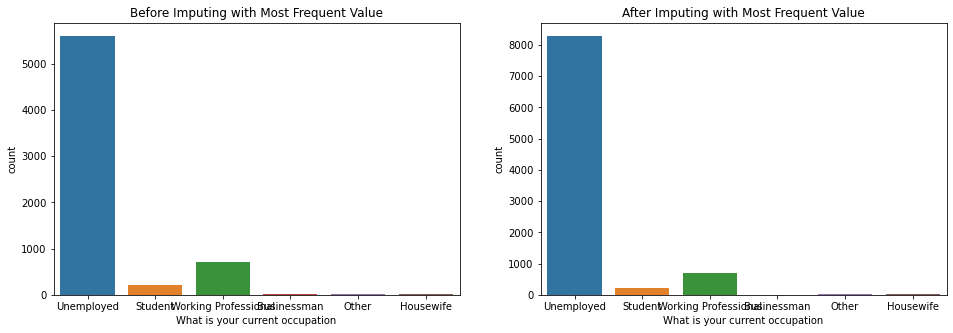

In [30]:
plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title("Before Imputing with Most Frequent Value")
sns.countplot(data = df, x = 'What is your current occupation')
plt.subplot(122)
plt.title("After Imputing with Most Frequent Value")
sns.countplot(data = df.fillna(value = df['What is your current occupation'].mode()[0]), x = 'What is your current occupation')

In [31]:
# in this case missing data is more than 3% so imputing with mode might introduce lot of skewness. 
# I am imputing missing data i.e. data is either null or data = "Select" with "Unknown"
df['What is your current occupation'][df['What is your current occupation'].isnull() | (df['What is your current occupation'] =="Select")  ] = "Unknown"

In [32]:
#What matters most to you in choosing a course


len(df['What matters most to you in choosing a course'][df['What matters most to you in choosing a course'].isnull() | (df['What matters most to you in choosing a course'] =="Select")  ])

2709

In [33]:
df['What matters most to you in choosing a course'][df['What matters most to you in choosing a course'].isnull() | (df['What matters most to you in choosing a course'] =="Select")  ] = "Unknown"

In [34]:
#Lead Profile


len(df['Lead Profile'][df['Lead Profile'].isnull() | (df['Lead Profile'] =="Select")  ])
#74% of data is missng or users have not selected any value . Dropping this column 
df = df.drop('Lead Profile' , axis =1 )

In [35]:
# Tags 
len(df['Tags'][df['Tags'].isnull() | (df['Tags'] =="Select")  ])

# Dropping colum
df = df.drop('Tags' , axis =1 )

# Treating Outliers 

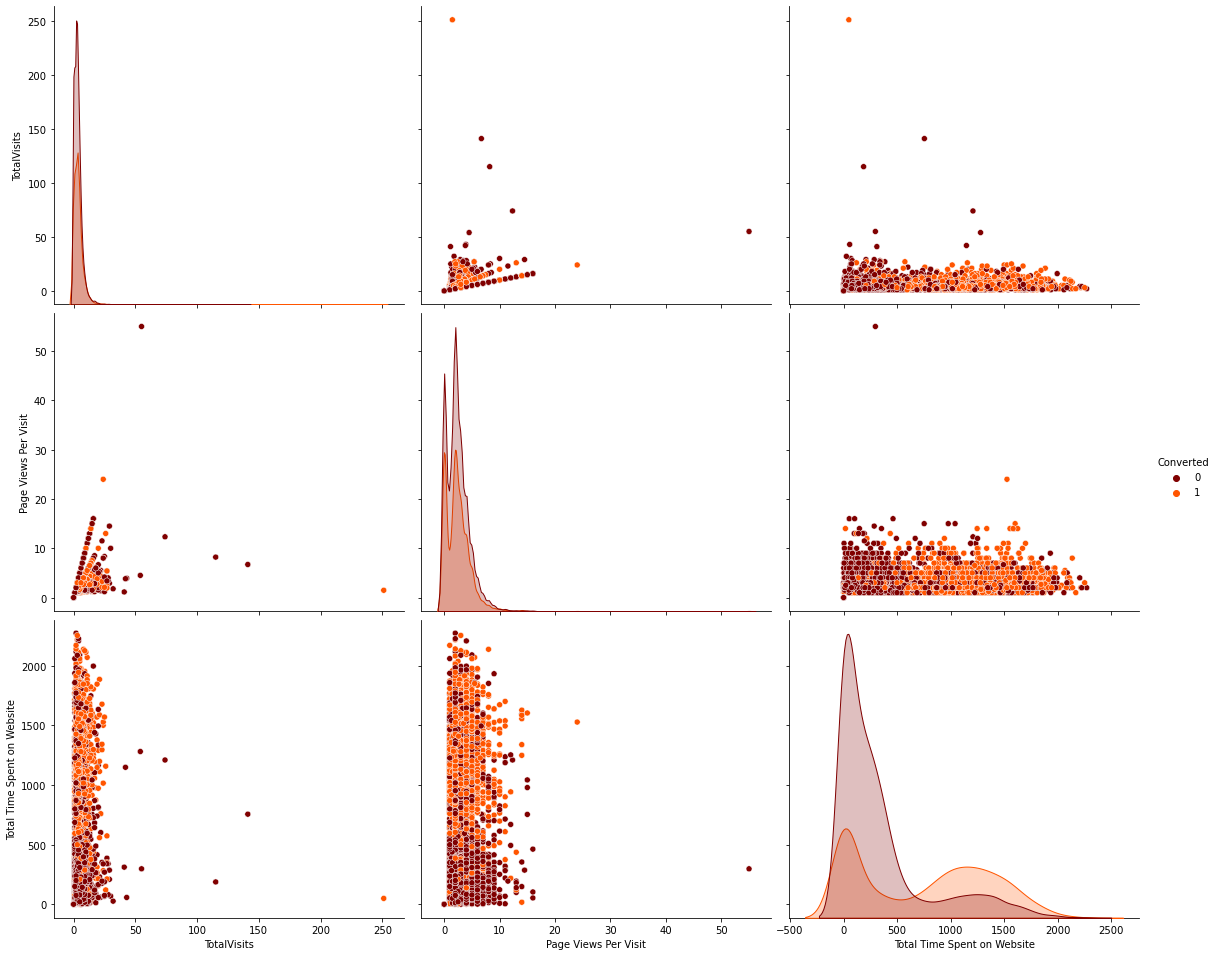

In [36]:
sns.pairplot(df[["TotalVisits" , "Page Views Per Visit" , "Total Time Spent on Website" , "Converted"]], hue = 'Converted', palette = 'gist_heat', height = 4.5, aspect = 1.2)


In [37]:
num_cols.append("Total Time Spent on Website")

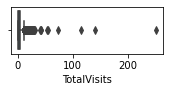

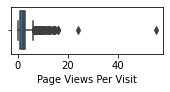

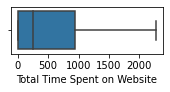

In [38]:
#calculating the outliers

for i in enumerate(num_cols):
    
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(x = i[1] , data = df)
    plt.show()

In [39]:
##  removing outliers

for i , feature in enumerate(num_cols):
    desc = df[feature].describe()
    q1 = desc["25%"]
    q2 = desc["50%"]
    q3 = desc["75%"]
    iqr = q3 -q1 
    upper_boud = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr 
    df[feature] = np.where(df[feature] > upper_boud , upper_boud , df[feature])
    df[feature] = np.where( df[feature]  < lower_bound , lower_bound ,df[feature] )

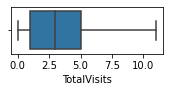

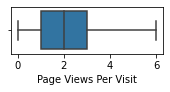

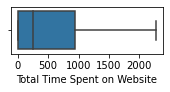

In [40]:
# recalculating outliers
for i in enumerate(num_cols):
    
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(x = i[1] , data = df)
    plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   float64
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

# Data Preparation

In [42]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article' , 
           'X Education Forums' , 'Newspaper','Digital Advertisement','Through Recommendations'
           ,'Receive More Updates About Our Courses','I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview' , 'Update me on Supply Chain Content' ]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [43]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0.0,0.0,Page Visited on Website,...,0,0,0,0,0,0,Mumbai,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674.0,2.5,Email Opened,...,0,0,0,0,0,0,Mumbai,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,Email Opened,...,0,0,0,0,0,0,Mumbai,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305.0,1.0,Unreachable,...,0,0,0,0,0,0,Mumbai,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428.0,1.0,Converted to Lead,...,0,0,0,0,0,0,Mumbai,0,0,Modified


In [44]:
#Google and google are same in df["Lead Source"].Converting google to Google
df["Lead Source"][df["Lead Source"] == "google"] = "Google"

In [45]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
cat_cols = ['Lead Origin' , 'Lead Source' , 'Specialization' , "Last Activity",
    'What matters most to you in choosing a course','Last Notable Activity' ,'City',
            'What is your current occupation' ]
for col in cat_cols:
    dummy1 = pd.get_dummies(df[col], drop_first=True ,  prefix=col)
    df = pd.concat([df, dummy1], axis=1)
    df = df.drop(col , axis =1)
  
 


In [46]:
df

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
0,660737,0,0,0,0.0,0.0,0.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,660728,0,0,0,5.0,674.0,2.50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,660727,0,0,1,2.0,1532.0,2.00,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,660719,0,0,0,1.0,305.0,1.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,660681,0,0,1,2.0,1428.0,1.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,0,1,8.0,1845.0,2.67,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9236,579546,0,0,0,2.0,238.0,2.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9237,579545,1,0,0,2.0,199.0,2.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9238,579538,0,0,1,3.0,499.0,3.00,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [47]:
df.to_csv("prepared_dataset.csv")

# Test-Train Split

In [48]:
# Putting feature variable to X
X = df.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
0,0,0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674.0,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,2.0,1532.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1.0,305.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,2.0,1428.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [51]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
1871,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6795,0,0,0.363636,0.214349,0.221667,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3516,0,0,0.454545,0.046655,0.416667,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8105,0,0,0.454545,0.541373,0.833333,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3934,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
### Checking the Conversion Rate
conversion_rate = (sum(df['Converted'])/len(df['Converted'].index))*100
round(conversion_rate,2)

38.54

# Model Building 


In [53]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6374
Model Family:                Binomial   Df Model:                           93
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 11 Oct 2023   Deviance:                          nan
Time:                        09:56:23   Pearson chi2:                 7.75e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    1.726e+15   5.28e+07   3.27e+07      0.000    1.73e+15    1.73e+15
Do Not Email                                                            -7.048e+14   4.44e+06  -1.59e+08      0.000   -7.05e+14   -7.05e+14
Do Not Call                                                              7.326e+13   4.77e+07   1.54e+06      0.000    7.33e+13    7.33e+13
TotalVisits                                                               8.31e+14   5.31e+06   1.56e+08      0.000    8.31e+14    8.31e+14
Total Time Spent on Website                                              2.909e+15   3.99e+06    7.3e+08      0.000    2.91e+15    2.91e+15
Page Views Per Visit                                                    -9.338e+14   5.18e+06   -1.8e+08      0.000   -9.34e+14   -9.34e+14
Search                                                                   5.363e+14   2.21e+07   2.42e+07      0.000    5.36e+14    5.36e+14
Magazine                                                                   -0.9235   9.24e-07     -1e+06      0.000      -0.924      -0.924
Newspaper Article                                                        4.206e+15   6.73e+07   6.25e+07      0.000    4.21e+15    4.21e+15
X Education Forums                                                      -4.746e+15   1.11e+08  -4.26e+07      0.000   -4.75e+15   -4.75e+15
Newspaper                                                               -6.745e+15   6.73e+07     -1e+08      0.000   -6.74e+15   -6.74e+15
Digital Advertisement                                                   -2.723e+15   4.77e+07  -5.71e+07      0.000   -2.72e+15   -2.72e+15
Through Recommendations                                                 -9.126e+14   2.86e+07  -3.19e+07      0.000   -9.13e+14   -9.13e+14
Receive More Updates About Our Courses                                     26.8590   4.65e-07   5.78e+07      0.000      26.859      26.859
Update me on Supply Chain Content                                           8.5076   6.64e-07   1.28e+07      0.000       8.508       8.508
I agree to pay the amount through cheque                                    7.6185   7.79e-07   9.78e+06      0.000       7.618       7.618
A free copy of Mastering The Interview                                  -2.017e+14    2.7e+06  -7.47e+07      0.000   -2.02e+14   -2.02e+14
Lead Origin_Landing Page Submission                                     -3.461e+14   3.43e+06  -1.01e+08      0.000   -3.46e+14   -3.46e+14
Lead Origin_Lead Add Form                                                1.741e+15    1.3e+07   1.34e+08      0.000    1.74e+15    1.74e+15
Lea

##  Feature Selection Using RFE

In [54]:

logreg = LogisticRegression()

In [55]:

rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [56]:
rfe.support_

array([ True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True])

In [57]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 28),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 59),
 ('Magazine', False, 84),
 ('Newspaper Article', False, 17),
 ('X Education Forums', False, 50),
 ('Newspaper', False, 6),
 ('Digital Advertisement', False, 13),
 ('Through Recommendations', False, 38),
 ('Receive More Updates About Our Courses', False, 87),
 ('Update me on Supply Chain Content', False, 83),
 ('I agree to pay the amount through cheque', False, 85),
 ('A free copy of Mastering The Interview', False, 42),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 33),
 ('Lead Origin_Quick Add Form', False, 47),
 ('Lead Source_Direct Traffic', False, 32),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 49),
 ('Lead Source_NC_EDM', False, 12),
 ('Lead Source_Ola

In [58]:
col = X_train.columns[rfe.support_]

In [59]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Specialization_Business Administrat

### Assessing the model with StatsModels

In [60]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.5
Date:                Wed, 11 Oct 2023   Deviance:                       5274.9
Time:                        09:56:27   Pearson chi2:                 7.96e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.2435      0.109    -20.561      0.000      -2.457      -2.030
Do Not Email                                             -1.3412      0.165     -8.118      0.000      -1.665      -1.017
TotalVisits                                               1.3549      0.194      6.983      0.000       0.975       1.735
Total Time Spent on Website                               4.5019      0.165     27.250      0.000       4.178       4.826
Page Views Per Visit                                     -0.9643      0.195     -4.942      0.000      -1.347      -0.582
Lead Origin_Lead Add Form                                 3.3986      0.203     16.772      0.000       3.001       3.796
Lead Source_Olark Chat                                    1.3854      0.128     10.782      0.000       1.134       1.637
Lead Source_Welingak Website                              1.9887      0.743      2.676      0.007       0.532       3.445
Last Activity_Had a Phone Conversation                    0.7253      0.983      0.738      0.461      -1.202       2.652
Last Activity_Olark Chat Conversation                    -1.1764      0.167     -7.034      0.000      -1.504      -0.849
Last Activity_SMS Sent                                    1.3414      0.075     17.967      0.000       1.195       1.488
What matters most to you in choosing a course_Unknown    -1.1776      0.087    -13.608      0.000      -1.347      -1.008
Last Notable Activity_Had a Phone Conversation            2.8660      1.499      1.912      0.056      -0.072       5.804
Last Notable Activity_Unreachable                         2.0334      0.536      3.793      0.000       0.983       3.084
What is your current occupation_Housewife                22.8683   1.39e+04      0.002      0.999   -2.73e+04    2.74e+04
What is your current occupation_Working Professional      2.5577      0.187     13.676      0.000       2.191       2.924
=========================================================================================================================
"""

In [61]:
#### Dropping What is your current occupation_Housewife as the p_value is quite high i.e.0.999

In [62]:
col= col.drop("What is your current occupation_Housewife" )

In [63]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2644.4
Date:                Wed, 11 Oct 2023   Deviance:                       5288.8
Time:                        09:56:27   Pearson chi2:                 7.99e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.2286      0.109    -20.482      0.000      -2.442      -2.015
Do Not Email                                             -1.3473      0.165     -8.153      0.000      -1.671      -1.023
TotalVisits                                               1.3420      0.194      6.923      0.000       0.962       1.722
Total Time Spent on Website                               4.4991      0.165     27.263      0.000       4.176       4.823
Page Views Per Visit                                     -0.9623      0.195     -4.937      0.000      -1.344      -0.580
Lead Origin_Lead Add Form                                 3.4122      0.202     16.881      0.000       3.016       3.808
Lead Source_Olark Chat                                    1.3761      0.128     10.726      0.000       1.125       1.628
Lead Source_Welingak Website                              1.9649      0.743      2.645      0.008       0.509       3.421
Last Activity_Had a Phone Conversation                    0.7148      0.984      0.727      0.468      -1.214       2.643
Last Activity_Olark Chat Conversation                    -1.1813      0.167     -7.065      0.000      -1.509      -0.854
Last Activity_SMS Sent                                    1.3328      0.075     17.871      0.000       1.187       1.479
What matters most to you in choosing a course_Unknown    -1.1821      0.086    -13.669      0.000      -1.352      -1.013
Last Notable Activity_Had a Phone Conversation            2.8681      1.500      1.913      0.056      -0.071       5.807
Last Notable Activity_Unreachable                         2.0263      0.536      3.779      0.000       0.975       3.077
What is your current occupation_Working Professional      2.5499      0.187     13.638      0.000       2.183       2.916
=========================================================================================================================
"""

In [64]:
#### Dropping Last Activity_Had a Phone Conversation as the p_value is quite high than ..05 i.e.0.207	

In [65]:
col= col.drop("Last Notable Activity_Had a Phone Conversation" )

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.4
Date:                Wed, 11 Oct 2023   Deviance:                       5292.8
Time:                        09:56:27   Pearson chi2:                 9.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.2256      0.109    -20.470      0.000      -2.439      -2.012
Do Not Email                                             -1.3516      0.165     -8.186      0.000      -1.675      -1.028
TotalVisits                                               1.3507      0.193      6.981      0.000       0.971       1.730
Total Time Spent on Website                               4.4907      0.165     27.239      0.000       4.168       4.814
Page Views Per Visit                                     -0.9688      0.195     -4.975      0.000      -1.350      -0.587
Lead Origin_Lead Add Form                                 3.4065      0.202     16.854      0.000       3.010       3.803
Lead Source_Olark Chat                                    1.3736      0.128     10.712      0.000       1.122       1.625
Lead Source_Welingak Website                              1.9685      0.743      2.649      0.008       0.512       3.425
Last Activity_Had a Phone Conversation                    2.2743      0.684      3.324      0.001       0.933       3.615
Last Activity_Olark Chat Conversation                    -1.1814      0.167     -7.067      0.000      -1.509      -0.854
Last Activity_SMS Sent                                    1.3329      0.075     17.878      0.000       1.187       1.479
What matters most to you in choosing a course_Unknown    -1.1825      0.086    -13.677      0.000      -1.352      -1.013
Last Notable Activity_Unreachable                         2.0247      0.536      3.777      0.000       0.974       3.075
What is your current occupation_Working Professional      2.5468      0.187     13.619      0.000       2.180       2.913
=========================================================================================================================
"""

In [67]:
#### Checking VIFs

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.87
1,TotalVisits,5.15
2,Total Time Spent on Website,2.04
5,Lead Source_Olark Chat,1.58
9,Last Activity_SMS Sent,1.53
10,What matters most to you in choosing a course_...,1.50
8,Last Activity_Olark Chat Conversation,1.42
4,Lead Origin_Lead Add Form,1.39
6,Lead Source_Welingak Website,1.24
12,What is your current occupation_Working Profes...,1.19


In [69]:
## No VIF treatment is needed

# Evaluating the Model

In [70]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.299013
6795    0.271583
3516    0.393600
8105    0.793319
3934    0.299013
4844    0.991765
3297    0.146392
8071    0.998797
987     0.137536
7423    0.910747
dtype: float64

In [71]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29901326, 0.27158298, 0.39359966, 0.79331927, 0.29901326,
       0.99176503, 0.14639166, 0.99879671, 0.13753612, 0.9107466 ])

### Creating a dataframe with the actual converted flag and the predicted probabilities

In [72]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.299013,1871
1,0,0.271583,6795
2,0,0.393600,3516
3,0,0.793319,8105
4,0,0.299013,3934


In [73]:
##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [74]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.299013,1871,0
1,0,0.271583,6795,0
2,0,0.393600,3516,0
3,0,0.793319,8105,1
4,0,0.299013,3934,0


In [75]:
y_train_pred_final.Converted.sum()

2466

In [76]:
len(y_train_pred_final.Converted) 

6468

In [77]:
y_train_pred_final.predicted.sum()

2177

In [78]:
len(y_train_pred_final.predicted) 

6468

In [79]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3552  450]
 [ 739 1727]]


In [80]:
# Predicted     converted    not_converted
# Actual
# converted        3554      448
# not_converted    738       1728  

In [81]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8161719233147805


In [82]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [83]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7003244120032441

In [84]:
# Let us calculate specificity
TN / float(TN+FP)

0.8875562218890555

In [85]:
# Calculate false postive rate - predicting lead got converted  when actually they were not 
print(FP/ float(TN+FP))

0.11244377811094453


In [86]:
# positive predictive value 
print (TP / float(TP+FP))

0.7932935231970601


In [87]:
# Negative predictive value
print (TN / float(TN+ FN))

0.827779072477278


In [88]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

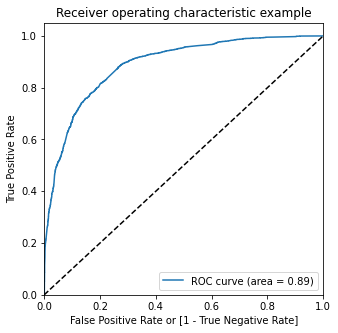

In [90]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [91]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.299013,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.271583,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.393600,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.793319,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.299013,3934,0,1,1,1,0,0,0,0,0,0,0


In [92]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.591373  0.979319  0.352324
0.2   0.2  0.761286  0.915653  0.666167
0.3   0.3  0.798237  0.832522  0.777111
0.4   0.4  0.812925  0.763179  0.843578
0.5   0.5  0.816172  0.700324  0.887556
0.6   0.6  0.806741  0.632198  0.914293
0.7   0.7  0.783859  0.520681  0.946027
0.8   0.8  0.752628  0.400649  0.969515
0.9   0.9  0.719388  0.286294  0.986257


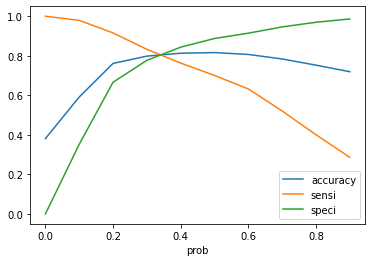

In [93]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [94]:
#### From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [95]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.299013,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.271583,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.393600,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.793319,8105,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.299013,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [96]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8124613481756339

In [97]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3341,  661],
       [ 552, 1914]])

In [98]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [99]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7761557177615572

In [100]:
# Let us calculate specificity
TN / float(TN+FP)

0.834832583708146

In [101]:

print(FP/ float(TN+FP))

0.16516741629185408


In [102]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7433009708737864


In [103]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8582070382738248


In [104]:
### Precision and recall tradeoff

In [105]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [106]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

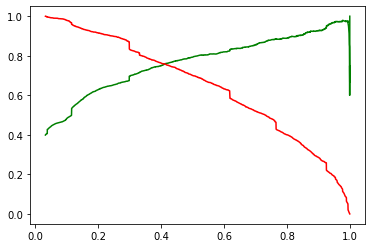

In [107]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set


In [108]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [109]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What matters most to you in choosing a course_Unknown,Last Notable Activity_Unreachable,What is your current occupation_Working Professional
4269,0,0.727273,0.444982,1.000000,0,0,0,0,0,1,1,0,0
2376,0,0.000000,0.000000,0.000000,1,0,0,0,0,1,0,0,0
7766,0,0.454545,0.025968,0.833333,0,0,0,0,0,0,0,1,1
9199,0,0.000000,0.000000,0.000000,0,1,0,0,1,0,0,0,0
4359,0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0


In [110]:
X_test_sm = sm.add_constant(X_test)

In [111]:
y_test

4269    1
2376    1
7766    1
9199    0
4359    1
       ..
8649    0
2152    1
7101    0
5331    0
2960    1
Name: Converted, Length: 2772, dtype: int64

In [113]:
# Making predictions on the test set

In [114]:
y_test_pred = res.predict(X_test_sm)

In [115]:
y_test_pred[:10]

4269    0.484147
2376    0.925100
7766    0.906296
9199    0.115743
4359    0.765106
9186    0.521206
1631    0.397299
8963    0.172258
8007    0.054981
5324    0.333478
dtype: float64

In [116]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [117]:
# Let's see the head
y_pred_1.head()

,0
4269,0.484147
2376,0.925100
7766,0.906296
9199,0.115743
4359,0.765106


In [118]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [119]:
# Putting CustID to index
y_test_df['Lead Number'] = y_test_df.index

In [120]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [121]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [122]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.484147
1,1,2376,0.925100
2,1,7766,0.906296
3,0,9199,0.115743
4,1,4359,0.765106


In [123]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [124]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [125]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,4269,1,0.484147
1,2376,1,0.925100
2,7766,1,0.906296
3,9199,0,0.115743
4,4359,1,0.765106


In [126]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [127]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,4269,1,0.484147,1
1,2376,1,0.925100,1
2,7766,1,0.906296,1
3,9199,0,0.115743,0
4,4359,1,0.765106,1


In [128]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8156565656565656

In [129]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1408,  269],
       [ 242,  853]])

In [130]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [131]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7789954337899543

In [132]:
# Let us calculate 


TN / float(TN+FP)

0.8395945140131187